# Определение перспективного тарифа для телеком компании

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt

Открыли необходимые для работы библиотеки

## 1. Откроем файлы с данными и изучим общую информацию
<a id= "start"></a>

Для исследования нам предоставлены 5 таблиц с данными о пользователях тарифов компании "Мегалайн". Откроем их и изучим общую информацию.

In [ ]:
data1 = pd.read_csv('/datasets/calls.csv')
data2 = pd.read_csv('/datasets/internet.csv')
data3 = pd.read_csv('/datasets/messages.csv')
data4 = pd.read_csv('/datasets/tariffs.csv')
data5 = pd.read_csv('/datasets/users.csv')

In [ ]:
data1.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Первая таблица содержит информацию о звонках пользователей, их продолжительности и дате, когда звонки были сделаны.

In [ ]:
data2.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Во второй таблице хранится информация об использовании интернет-траффика так же по каждому пользователю с датой интенет-сессии и объемом потраченного за нее интернета(в мегабайтах)

In [ ]:
data3.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В третьей таблице представлена инфорация по дате отпраки пользователем сообщений.

In [ ]:
data4.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Четвертая таблица состоит из двух строк и содержит информацию об исследуемых тарифах, количествах смс, минут и интернета, входящего в абонентскую плату и стоимости их использования сверх тарифного плана.

In [ ]:
data5.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В пятой табице представлена информация о пользователях.

### Вывод:

В первом пункте нашего исследования ознакомились с предоставленными таблицами. У нас имеется пять таблиц с данными о 500 пользователей тарифов компании "Мегалайн". Имеются данные о количестве отправленных смс, продолжительности звонков, объеме интернет-трафика, а также таблица с описанием тарифов "Смарт" и "Ультра". На основе этих данных проведем исследование и постараемся выяснить, какой тариф лучше и приносит компании больше денег.

## 2. Предобработка данных
<a id= "preprocessing"></a>

При изучении информации о представленных нам таблицах, заметили, что все столбцы с данными о датах имеют тип object. Замеим его на тип datetime.

In [ ]:
data1['call_date'] = pd.to_datetime(data1['call_date'], format='%Y-%m-%d')
data2['session_date'] = pd.to_datetime(data2['session_date'], format='%Y-%m-%d')
data3['message_date'] = pd.to_datetime(data3['message_date'], format='%Y-%m-%d')
data5['churn_date'] = pd.to_datetime(data5['churn_date'], format='%Y-%m-%d')
data5['reg_date'] = pd.to_datetime(data5['reg_date'], format='%Y-%m-%d')

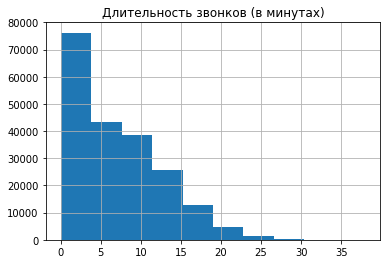

In [ ]:
data1['duration'].hist()
plt.title('Длительность звонков (в минутах)')
plt.show()

In [ ]:
len(data1.query('duration == 0')) / len(data1)

0.19551644316336553

Почти 20 процентов звонков по длительности равны нулю. Предположим, что это пропущенные звонки. Для нашего исследования убирать эти значения не будем, так как на результат они не повлияют (только на количество сделанных звонков). В ходе работы мы будем суммировать длительность звонков по каждому пользователю за месяц и исследовать уже суммированные данные.

In [ ]:
data1['duration'] = np.ceil(data1['duration'])
data2['mb_used'] = np.ceil(data2['mb_used'])

Так как оператор округляет значения минут и мегабайтов вверх, обработали столбцы `duration` и `mb_used`.

In [ ]:
#data4.rename(columns={'tariff_name':'tariff'}, inplace=True)
data4['tariff'] = data4['tariff_name']

В четвертой таблице переименовали столбец с названием тарифа с `tariff_name` на `tariff` для удобства последующего объединения таблиц. Так как в пятой таблице этот столбец имеет название `tariff`.

### Вывод:

В столбцах с датами изменили тип данных на datetime. Заметили, что пятая часть всех звонков имеет нулевую длительность. Пришли к выводу, что это пропущенные звонки. Решили данные оставить, так как сильно на результат исследования они не повлияют. Затем округлили данные по длительности звонков и объему интернет-трафика, так как оператор округляет значения минут и мегабайтов вверх до целого. Пропуски в представленных данных есть только в столбце `churn_date`, содержащем информацию о дате прекращения пользования тарифом. Заполнять эти пропуски не стали, так как столбе для исследования нам не понадобится.

## 3. Добавление новых данных
<a id = "newdata" ></a>

Для начала исходя из данных столбца о датах создадим для таблиц с сообщениями, звонками и интернетом новый столбец с месяцем.

In [ ]:
data1['month'] = data1['call_date'].dt.month
data2['month'] = data2['session_date'].dt.month
data3['month'] = data3['message_date'].dt.month

Сгруппируем данные по звонкам, продолжительности звонков, количеству смс и израсходованного интернет-трафика по id пользователей и месяцу. Сохраним эти данные в отдельные переменные

In [ ]:
calls = pd.DataFrame(data1.groupby(['user_id', 'month'])['id'].agg('count')).reset_index()

In [ ]:
calls

,user_id,month,id
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
...,...,...,...
3169,1498,10,41
3170,1499,9,9
3171,1499,10,68
3172,1499,11,74


In [ ]:
calls.rename(columns={'id':'calls'}, inplace=True)
calls.columns

Index(['user_id', 'month', 'calls'], dtype='object')

In [ ]:
minutes = pd.DataFrame(data1.groupby(['user_id', 'month'])['duration'].agg('sum')).reset_index()
minutes

,user_id,month,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
...,...,...,...
3169,1498,10,247.0
3170,1499,9,70.0
3171,1499,10,449.0
3172,1499,11,612.0


In [ ]:
messages = pd.DataFrame(data3.groupby(['user_id', 'month'])['id'].agg('count')).reset_index()
messages

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [ ]:
messages.rename(columns={'id':'sms'}, inplace=True)
messages.columns

Index(['user_id', 'month', 'sms'], dtype='object')

In [ ]:
internet = pd.DataFrame(data2.groupby(['user_id', 'month'])['mb_used'].agg('sum')).reset_index()
internet

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3198,1498,10,20604.0
3199,1499,9,1848.0
3200,1499,10,17809.0
3201,1499,11,17984.0


### Объединим все сгруппированные таблицы и данные по тарифам и пользователям в одну 

In [ ]:
df = minutes.merge(
    calls, on=['user_id', 'month'], how='left').merge(
    messages, on=['user_id', 'month'], how='left').merge(
    internet, on=['user_id', 'month'], how='left').merge(
    data5, on='user_id', how='right').merge(data4, on='tariff', how='left')


In [ ]:
df.sample(5)

,user_id,month,duration,calls,sms,mb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
2128,1340,2.0,425.0,56.0,7.0,16842.0,50,NaT,Пенза,Тимофей,...,2018-01-30,smart,50,15360,500,550,200,3,3,smart
1110,1176,8.0,432.0,56.0,40.0,14435.0,37,NaT,Волгоград,Радим,...,2018-01-20,smart,50,15360,500,550,200,3,3,smart
70,1009,10.0,213.0,28.0,15.0,20112.0,24,NaT,Пермь,Василиса,...,2018-03-22,smart,50,15360,500,550,200,3,3,smart
172,1026,11.0,469.0,61.0,48.0,12204.0,32,NaT,Мурманск,Евгений,...,2018-10-06,smart,50,15360,500,550,200,3,3,smart
1341,1212,12.0,443.0,72.0,129.0,21762.0,21,NaT,Саранск,Руслан,...,2018-11-09,smart,50,15360,500,550,200,3,3,smart


In [ ]:
len(df['user_id'].unique())

500

In [ ]:
print(f'Количество пользователей: {df.user_id.nunique()}')

Количество пользователей: 500


In [ ]:
df.isnull().sum()

user_id                     0
month                       8
duration                    8
calls                       8
sms                       504
mb_used                    19
age                         0
churn_date               2993
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
dtype: int64

Замечаем, что в столбце с сообщениями и исразходованным интернетом появились пропуски. Удалим их.

In [ ]:
df.dropna(subset=['sms', 'mb_used'], inplace=True)

### Добавим столбцы, содержащие информацию о превышении тарифного плана по звонкам, смс и интернету

Для этого вычтем данные о количестве звонков, смс и интернета, входящего в абонентскую плату из израсходованных по каждому пользователю в месяц и выведем данные в отдельные столбцы

In [ ]:
df['call_overlimit'] = df['duration'] - df['minutes_included'] 
df['sms_overlimit'] = df['sms'] - df['messages_included'] 
df['internet_overlimit'] = df['mb_used'] - df['mb_per_month_included'] 

Видим, что в случаях, где нет превышения тарифного плана, появились отрицательные значения. Приравняем отрицательные значения к нулю.

In [ ]:
df.loc[df['call_overlimit'] < 0, 'call_overlimit'] = 0
df.loc[df['sms_overlimit'] < 0, 'sms_overlimit'] = 0
df.loc[df['internet_overlimit'] < 0, 'internet_overlimit'] = 0

Столбец с интернетом переведем в гигабайты и округлим его вверх до целых значений, так как цена за превышение интернет-трафика рассчитывается в гигабайтах

In [ ]:
df['internet_overlimit'] = np.ceil(df['internet_overlimit'] / 1024)

In [ ]:
df.sample(10)

,user_id,month,duration,calls,sms,mb_used,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,call_overlimit,sms_overlimit,internet_overlimit
2014,1321,11.0,450.0,62.0,30.0,19235.0,29,NaT,Москва,Онисим,...,15360,500,550,200,3,3,smart,0.0,0.0,4.0
1469,1235,11.0,481.0,88.0,66.0,15622.0,26,NaT,Москва,Агафья,...,15360,500,550,200,3,3,smart,0.0,16.0,1.0
1267,1200,11.0,708.0,99.0,51.0,18548.0,36,NaT,Санкт-Петербург,Тамара,...,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0
2703,1425,8.0,525.0,78.0,72.0,13362.0,51,NaT,Пермь,Вадим,...,15360,500,550,200,3,3,smart,25.0,22.0,0.0
2695,1424,11.0,16.0,6.0,83.0,17161.0,27,NaT,Москва,Розалия,...,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0
2200,1353,8.0,483.0,59.0,48.0,16280.0,57,2018-11-26,Санкт-Петербург,Доминика,...,15360,500,550,200,3,3,smart,0.0,0.0,1.0
2515,1396,2.0,432.0,56.0,59.0,5183.0,23,NaT,Пенза,Эльга,...,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0
1456,1230,12.0,317.0,41.0,16.0,14102.0,44,NaT,Томск,Ренальд,...,15360,500,550,200,3,3,smart,0.0,0.0,0.0
2654,1419,7.0,206.0,31.0,19.0,5882.0,19,NaT,Новороссийск,Эльмира,...,15360,500,550,200,3,3,smart,0.0,0.0,0.0
1852,1295,11.0,240.0,35.0,97.0,20738.0,19,NaT,Краснодар,Олеся,...,15360,500,550,200,3,3,smart,0.0,47.0,6.0


### Рассчитаем итоговую выручку по каждому пользователю за месяц с учетом превышения тарифного плана и добавим в новый столбец

In [ ]:
df['cost'] = df['rub_monthly_fee'] + df['call_overlimit'] * df['rub_per_minute'] + df['sms_overlimit'] *df['rub_per_message'] + df['internet_overlimit'] * df['rub_per_gb']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 0 to 3173
Data columns (total 25 columns):
user_id                  2667 non-null int64
month                    2667 non-null float64
duration                 2667 non-null float64
calls                    2667 non-null float64
sms                      2667 non-null float64
mb_used                  2667 non-null float64
age                      2667 non-null int64
churn_date               139 non-null datetime64[ns]
city                     2667 non-null object
first_name               2667 non-null object
last_name                2667 non-null object
reg_date                 2667 non-null datetime64[ns]
tariff                   2667 non-null object
messages_included        2667 non-null int64
mb_per_month_included    2667 non-null int64
minutes_included         2667 non-null int64
rub_monthly_fee          2667 non-null int64
rub_per_gb               2667 non-null int64
rub_per_message          2667 non-null int64
rub_per

### Вывод:

В данном блоке добавили необходимые для исследования данные. Для начала добавили столбцы с месяцем, сгруппировали данные по о количестве и длительности звонков, количестве отправленных смс и объему израсходованного интернет-трафика по каждому пользователю в месяц. Затем соединили все данные в одну таблицу, объединив их с информацией о каждом пользователе и сведениями о тарифах. Затем посчитали и добавили в общую таблицу данные о превышении тарифного плана и вывели итоговый столбец с общей выручкой за месяц.

## 4. Проанализируем данные клиентов по каждому тарифу
<a id= "analysis"></a>

Создадим две переменные, содержащие информацию по каждому тарифу

In [ ]:
df_smart = pd.DataFrame(df.query('tariff == "smart"'))
df_ultra = pd.DataFrame(df.query('tariff == "ultra"'))

In [ ]:
len(df_smart['user_id'].value_counts())

301

In [ ]:
len(df_ultra['user_id'].value_counts())

118

Замечаем, что количество пользователей тарифа "Смарт" больше чем в два раза превосходит пользователей тарифа "Ультра", что объясняется большей экономностью первого тарифа.

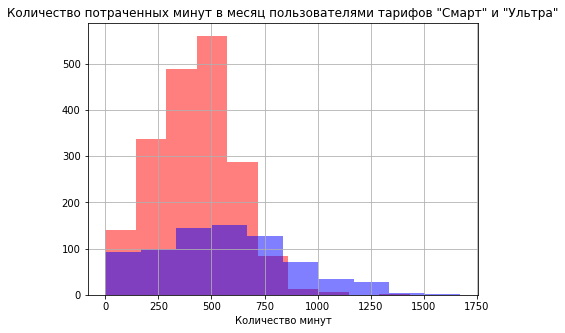

In [ ]:
df_smart['duration'].hist(figsize=(7,5), alpha=0.5, color='red')
df_ultra['duration'].hist(figsize=(7,5), alpha=0.5, color='blue')
plt.title('Количество потраченных минут в месяц пользователями тарифов "Смарт" и "Ультра"')
plt.xlabel('Количество минут')
plt.show()

In [ ]:
df_ultra['duration'].max()

1673.0

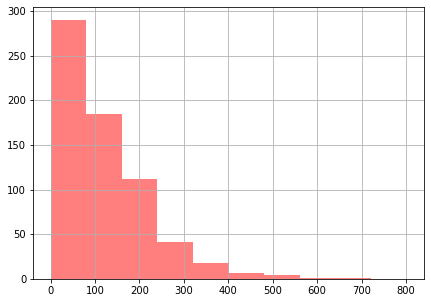

In [ ]:
df_smart['call_overlimit'].hist(figsize=(7,5), alpha=0.5, color='red', range=(1,800))
df_ultra['call_overlimit'].hist(figsize=(7,5), alpha=0.5, color='blue', range=(1,800))

Интересно, что сверх тарифного плана выходят пользователи тарифа "Смарт", у которых в месяц в абонентскую плату входят 500 минут. Пользователям тарифа "Ультра" 3000 минут в месяц хватает.

Посчитаем среднее значение, дисперсию и стандартное отклонение для длительности звонков

In [ ]:
np.mean(df_smart['duration'])

421.0349869451697

In [ ]:
np.mean(df_ultra['duration'])

556.8577127659574

In [ ]:
np.var(df_smart['duration'])

35217.697470430634

In [ ]:
np.var(df_ultra['duration'])

97129.07948838559

In [ ]:
np.std(df_smart['duration'])

187.66378838345622

In [ ]:
np.std(df_ultra['duration'])

311.65538578433967

Дисперсия и стандартное отклонение у выборки по тарифу Ультра больше, так как количество минут входящих в абонентскую плату больше и даже по графику заметен чуть больший разброс по распределению данных.

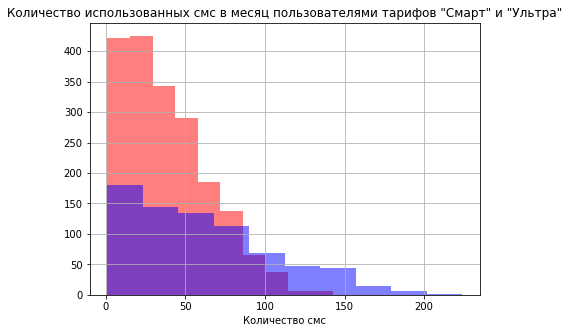

In [ ]:
df_smart['sms'].hist(figsize=(7,5), alpha=0.5, color='red')
df_ultra['sms'].hist(figsize=(7,5), alpha=0.5, color='blue')
plt.title('Количество использованных смс в месяц пользователями тарифов "Смарт" и "Ультра"')
plt.xlabel('Количество смс')
plt.show()

In [ ]:
df_ultra['sms'].max()

224.0

Исходя из графика видим, что чаще всего пользователи тарифа Смарт отправляют в месяц до 50 сообщений, но бывают и те, кто отправляет больше, тем самым допласивая за дополнительные смс сверх тарифа. А вот пользователи тарифа Ультра в свои 1000 смс в месяц вполне укладываются. Посмотрим на данные сверх тарифного плана на отдельном графике.

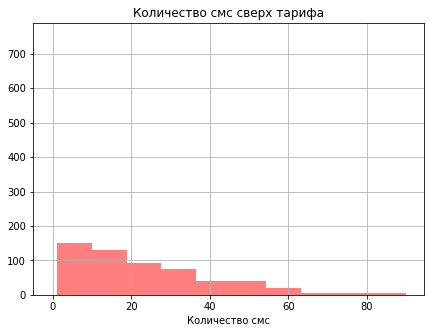

In [ ]:
df_smart['sms_overlimit'].hist(figsize=(7,5), alpha=0.5, color='red', range=(1,90))
df_ultra['sms_overlimit'].hist(figsize=(7,5), alpha=0.5, color='blue')
plt.title('Количество смс сверх тарифа')
plt.xlabel('Количество смс')
plt.show()

Как и писали выше, пользователям тарифа "Смарт" иногда не хватает 50 сообщений в месяц, в отличие от тарифа "Ультра", в котором их 1000.

In [ ]:
np.mean(df_smart['sms']) 

38.76710182767624

In [ ]:
np.mean(df_ultra['sms'])

61.640957446808514

In [ ]:
np.var(df_smart['sms'])

718.4282649687434

In [ ]:
np.var(df_ultra['sms'])

2005.8790671684021

In [ ]:
np.std(df_smart['sms']) 

26.803512175995582

In [ ]:
np.std(df_ultra['sms'])

44.78704128616225

В данном примере так же больше разброс данных по количеству смс у тарифа Ультра, в связи с тем, что максимальное количество смс, входящих в тарифный план у Ультра выше и пользователи данного тарифа отправляют больше смс.

Посмотрим на объем использования интернет-трафика пользователями разного тарифа.

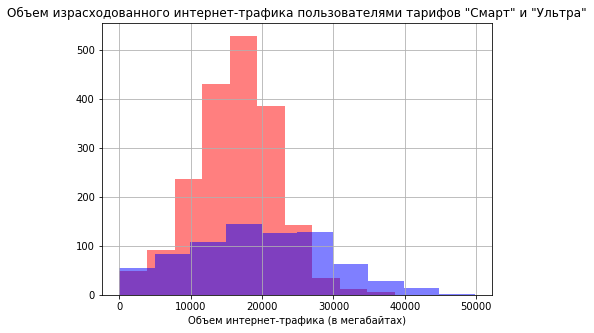

In [ ]:
df_smart['mb_used'].hist(figsize=(7,5), alpha=0.5, color='red')
df_ultra['mb_used'].hist(figsize=(7,5), alpha=0.5, color='blue')
plt.title('Объем израсходованного интернет-трафика пользователями тарифов "Смарт" и "Ультра"')
plt.xlabel('Объем интернет-трафика (в мегабайтах)')
plt.show()

In [ ]:
df_ultra['mb_used'].max()

49789.0

Большая часть пользователей тарифа Смарт укладывается в 15 гб интернет-трафика. Но есть и те, кто использует больше. Посмотрим на них отдельно.

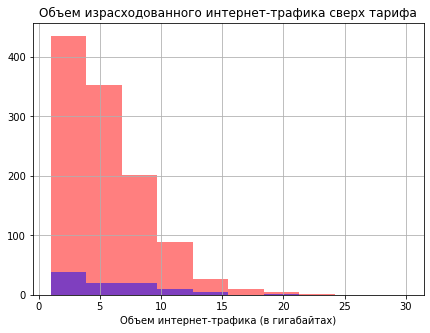

In [ ]:
df_smart['internet_overlimit'].hist(figsize=(7,5), alpha=0.5, color='red', range=(1,30))
df_ultra['internet_overlimit'].hist(figsize=(7,5), alpha=0.5, color='blue', range=(1,30))
plt.title('Объем израсходованного интернет-трафика сверх тарифа')
plt.xlabel('Объем интернет-трафика (в гигабайтах)')
plt.show()

А вот 30 гб интернета в тарифе Ультра пользователям иногда не хватает.

In [ ]:
np.mean(df_smart['mb_used'])

16266.113315926894

In [ ]:
np.mean(df_ultra['mb_used'])

19614.590425531915

In [ ]:
np.var(df_smart['mb_used'])

33622866.61431355

In [ ]:
np.var(df_ultra['mb_used'])

92771221.72852534

In [ ]:
np.std(df_smart['mb_used'])

5798.522795877719

In [ ]:
np.std(df_ultra['mb_used'])

9631.78185636102

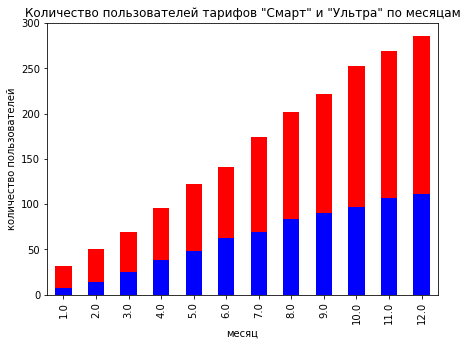

In [ ]:
df_smart.groupby('month')['user_id'].agg('count').plot(kind='bar', color='r', figsize=(7,5))
df_ultra.groupby('month')['user_id'].agg('count').plot(kind='bar', color='b', figsize=(7,5))
plt.title('Количество пользователей тарифов "Смарт" и "Ультра" по месяцам')
plt.xlabel('месяц')
plt.ylabel('количество пользователей')
plt.show()

На представленной диаграмме можем заметить, что в течение года увеличивается количество пользователей обоих тарифов.

### Вывод:

В данном блоке проанализировали данные о пользователях двух тарифов. Исходя из проведенных исследований, можем сказать, что пользователи тарифа Ультра, кроме интернет-трафика, укладываются в свой тарифный план и не платят почти ничего сверх него. А вот пользователям тарифа Смарт часто не хватает ни смс, ни минут, ни объема интернет-трафика, заложенного в их абонентскую плату. Что касается дисперсии, стандартного отклонения и среднего, то у тарифа Ультра эти значения по всем параметрам выше, так как верхняя граница использования исследуемых параметров у данного тарифа выше и соответсвенно разброс данных относительно среднего будет больше.

## 5. Проверка гипотез
<a id= "hypotheses"></a>

### Проверим гипотезу, что средняя выручка пльзователей тарифов ультра и смарт одинаковая

Сформулируем нулевую гипотезу(H0), что средняя выручка пользователей тарифа ультра и пользователей тарифа смарт одинакова. И соответственно альтернативная гипотеза(H1), что средняя выручка пользователей разных тарифов различна

In [ ]:
smart = np.array(df_smart['cost'])
ultra = np.array(df_ultra['cost'])

In [ ]:
np.var(smart)

681218.0250832714

In [ ]:
np.var(ultra)

112127.58884110456

In [ ]:
alpha = .05
results_tariff = st.ttest_ind(ultra, smart, equal_var=False)
print('p-значение:', results_tariff.pvalue)
if results_tariff.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.0219026919316575e-206
Отвергаем нулевую гипотезу


Значение pvalue очень маленькое, в связи с чем не пожем принять нулевую гипотезу и делаем вывод, что данные выборки различны.

In [ ]:
np.mean(smart)

1295.377545691906

In [ ]:
np.mean(ultra)

2049.7340425531916

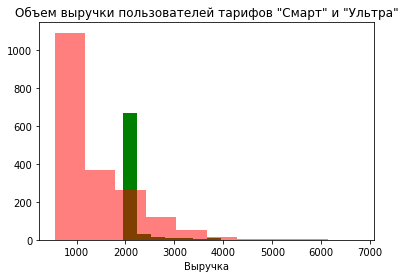

In [ ]:
plt.hist(ultra, color='g')
plt.hist(smart, color='r', alpha=0.5)
plt.title('Объем выручки пользователей тарифов "Смарт" и "Ультра"')
plt.xlabel('Выручка')
plt.show()

In [ ]:
np.std(ultra)

334.8545786473653

In [ ]:
np.std(smart)

825.359330887627

### Вывод:

Несмотря на то, что общий объем выручки по тарифу Смарт выше, что связано с большим количеством клиентов у данного тарифа, средняя выручка по тарифу ультра выше, что связано со стоимость почти в 4 раза превышающую стоимость тарифа Смарт. Также интересно, что средняя выручка по тарифу Смарт больше чем в два раза превышают стоимость абонентской платы, что указывает на то, что пользователи этого тарифа часто переплачивают за использование сверх тарифного плана. В связи с этим видим, что и значения стандартного отконения и дисперсии у Смарт больше. А вот среднее тарифа Ультра практически равно стоимости абонентской платы тарифа и переплата незначительна.

### Поверим гипотезу, что средняя выручка пользователей из Москвы сопоставима с выручкой пользователей из других регионов

Сформулируем нулевую гипотезу(H0), что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. А альтернативная гипотеза(H1) будет выглядеть следующим образом: Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

Создадим две переменные, хранящие информацию о пользователях из Москвы и других регионов.

In [ ]:
msc = df.query('city == "Москва"')
other = df.query('city != "Москва"')

In [ ]:
msc_cost = np.array(msc['cost'])
other_cost = np.array(other['cost'])

Проведем статистический тест и проверим нулевую гипотезу, что средняя выручка пользователей из Москвы равнозначна выручке пользователей из других регионов.

In [ ]:
np.var(msc_cost)

587872.2327599438

In [ ]:
np.var(other_cost)

646123.5091943443

In [ ]:
alpha = .05
results_city = st.ttest_ind(msc_cost, other_cost, equal_var=False)
print('p-значение:', results_city.pvalue)
if (results_city.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11294385160577562
Не получилось отвергнуть нулевую гипотезу


Принимаем нулевую гипотезу о том, что средняя выручка пользователей из Москвы и средняя выручка по остальным регионам одинакова. Вероятность 11 процентов достаточна, чтобы принять данную гипотезу.

In [ ]:
other['cost'].describe()

count    2176.000000
mean     1496.776195
std       804.002847
min       550.000000
25%       733.000000
50%      1550.000000
75%      1950.000000
max      6770.000000
Name: cost, dtype: float64

In [ ]:
msc['cost'].describe()

count     491.000000
mean     1558.173116
std       767.510242
min       550.000000
25%       798.000000
50%      1859.000000
75%      1950.000000
max      5321.000000
Name: cost, dtype: float64

Найдя среднее, стандартное отклонение и дисперсию выбоок по Москве и другим регионам, видим, что значения несильно отличаются друг от друга, чем можем подтвердить равенство двух выборок и правильность нулевой гипотезы.

In [ ]:
len(msc['user_id'].value_counts()) / len(df['user_id'].value_counts())

0.1957040572792363

Количество пользователей из Москвы составляет почти 1/5 от общего количества.

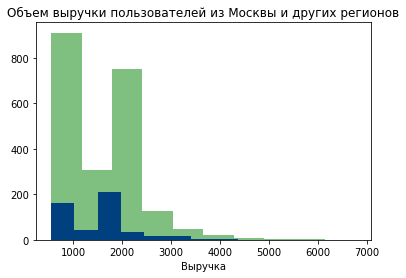

In [ ]:
plt.hist(msc_cost, color='b')
plt.hist(other_cost, alpha=0.5, color='g')
plt.title('Объем выручки пользователей из Москвы и других регионов')
plt.xlabel('Выручка')
plt.show()

### Вывод:

По графику хорошо заметно, что несмотря на то, что количество пользователей из Москвы значительно меньше, чем из других регионов вместе взятых, распределены данные одинаково, о чем говорят близкие зачения среднего, стандартного отклонения и дисперсии. Проверив нулевую гипотезу, выяснили, что средняя выручка по выборкам из Москвы и других регинов очень схожа. 

## Финальный вывод
<a id= "conclusion"></a>

В данном проекте мы проанализировали данные о пользователях тарифов компании "Мегалайн". Данная компания предлагает своим пользователям два тарифа: Смарт - более выгодный и экономный тариф, и Ультра - тариф более дорогой, но включающий в свой тарифный план значительно больше минут, смс и объем интернет-трафика. Задачей проекта было выяснить, какой тариф лучше и приносит компании больше денег. Проанализировав данные о 500 пользователей компании можем отметить следующие выводы:

- По общему объему выручки конечно лидирует тариф смарт, что объясняется большим, чем у тарифа Ультра, количеством пользователей.
- Количество пользователей каждого тарифа в течение года росло, но рост у тарифа Смарт был чуть более быстрым.
- Разброс данных по выручке  тарифа Смарт более большой, о чем свидетельствует его стандартное отконение. Это говорит о том, что пользователи этого тарифа чаще используют минуты, смс и интернет сверх тарифного плана. Порой им выгоднее было бы использовать тариф ультра, цена которого составляет около 2000 рублей. А также средняя выручка по тарифу Смарт больше чем в два раза превышает стоимость абонентской платы. А вот средняя выручка по тарифу Ультра близка к его стоимости. 

Проверив сформулированные нулевые гипотезы сделаем следующие выводы:

- Средняя выручка по тарифам Смарт и Ультра различна. Средняя выручка по тарифу Ультра выше, но количество пользователей тарифа Смарт больше, что говорит о большей популярности и выгодности данного тарифа. 
- Средняя выручка по пользователям из Москвы и других регионов одинакова.

Подведя итог можно сказать, что несмотря на экономность тарифа Смарт, есть пользователи, которые за счет дополнительных минут смс и гигабайтов, платят больше, чем пользователи тарифа Ультра. В сявзи с этим считаю, что как для пользователей, так и для оператора более выгодным можно считать тариф Смарт. Для первых он выгоден тем, что есть пользователи, которые укладываются в тарифный план и платят при этом в 4 раза меньше, чем, если бы пользовались тарифом Ультра. А оператору выгоден тем, что есть пользователи, которые используют тариф сверх плана и при этом приносят достаточно большую выручку компании. В то время как пользователи тарифа Ультра не выходят за лимит сообщений и звонков. В то же время тариф Ультра выгоден тем, что каждый месяц пользователь приносит компании достаточно высокую фиксированную сумму, какое количество смс, звонков и интернета он бы не истратил. Но все же считаю, что Смарт более выгоден, так как компания должна ориентироваться на интересы пользователей)